<a href="https://colab.research.google.com/github/Shraddha-gami-source/Machine-Learning/blob/master/LinearRegressionCarPricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
raw_data = pd.read_csv("1.04. Real-life example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


##Preprocessing

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis=0)

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


##Exploring the PDFs

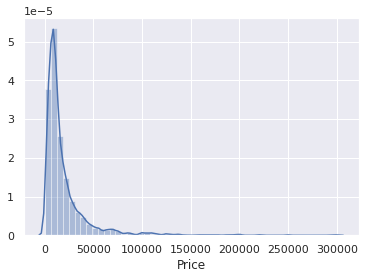

In [9]:
sns.distplot(data_no_mv['Price'])

##Dealing with Outliers

In [10]:
q = data_no_mv['Price'].quantile(0.99)
q

129812.51999999981

In [11]:
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


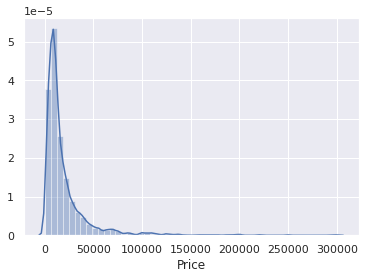

In [12]:
sns.distplot(data_no_mv['Price'])

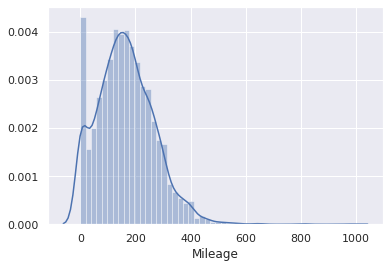

In [13]:
sns.distplot(data_1['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


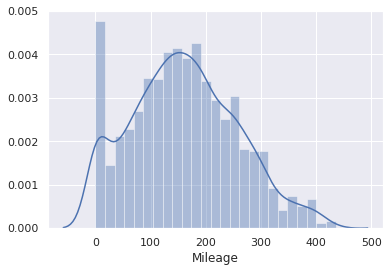

In [15]:
sns.distplot(data_2['Mileage'])

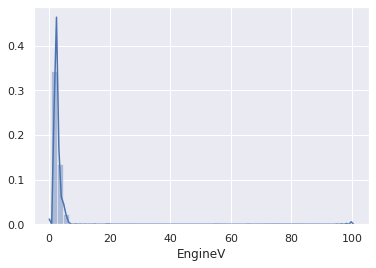

In [16]:
sns.distplot(data_2['EngineV'])

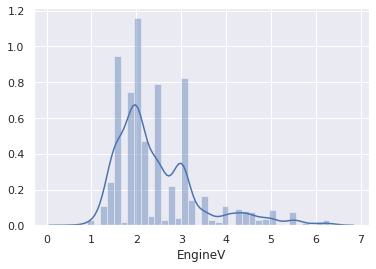

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

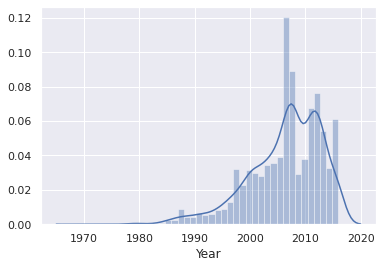

In [18]:
sns.distplot(data_3['Year'])

In [19]:
q = data_3['Year'].quantile(0.1)
data_4 = data_3[data_3['Year']>q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3459,3459.000000,3459,3459.000000,3459.000000,3459,3459,3459.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,762,NaN,1207,NaN,NaN,1698,3170,NaN
mean,NaN,19798.156652,NaN,147.932639,2.464053,NaN,NaN,2008.148598
std,NaN,19542.540521,NaN,86.691460,0.972008,NaN,NaN,4.575174
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000
25%,NaN,8400.000000,NaN,85.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12850.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23500.000000,NaN,205.000000,3.000000,NaN,NaN,2012.000000


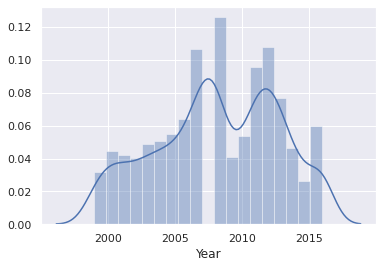

In [20]:
sns.distplot(data_4['Year'])

In [21]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3459,3459.000000,3459,3459.000000,3459.000000,3459,3459,3459.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,762,NaN,1207,NaN,NaN,1698,3170,NaN
mean,NaN,19798.156652,NaN,147.932639,2.464053,NaN,NaN,2008.148598
std,NaN,19542.540521,NaN,86.691460,0.972008,NaN,NaN,4.575174
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000
25%,NaN,8400.000000,NaN,85.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12850.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23500.000000,NaN,205.000000,3.000000,NaN,NaN,2012.000000


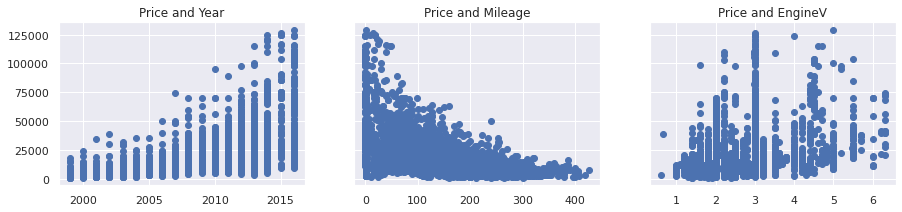

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price and Mileage')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title('Price and EngineV')
plt.show()

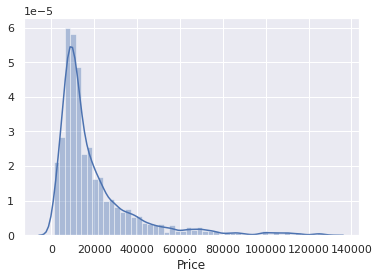

In [23]:
sns.distplot(data_cleaned['Price'])

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


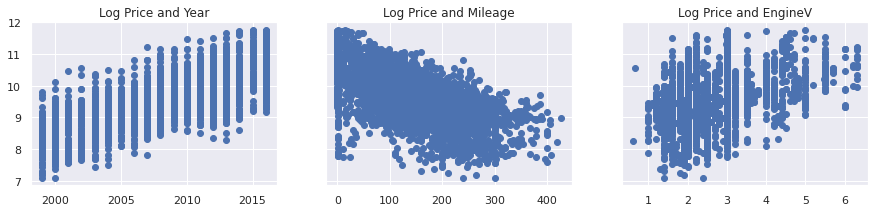

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title('Log Price and Mileage')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title('Log Price and EngineV')
plt.show()

In [26]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

##Multicolinearity

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage' ,'Year' ,'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [29]:
vif #vif=1 means no multi-collinearity, 1<vif<5 is perfectly Okay and vif>5|10 is unacceptable

,VIF,features
0,3.891813,Mileage
1,10.133661,Year
2,7.424041,EngineV


In [30]:
data_no_multicolinearity = data_cleaned.drop(['Year'], axis=1)

##Create Dummies

In [31]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first=True)

In [32]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


##Rearrange a bit

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


##Linear Regression Model

Declare the input and target

In [36]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
input_scaled = scaler.transform(inputs)

Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

Create the Regression

In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_hat = reg.predict(x_train)

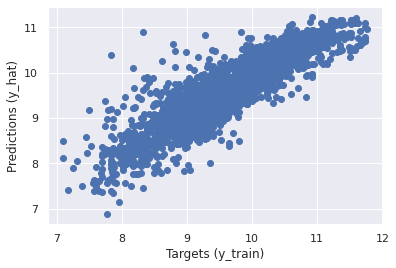

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()

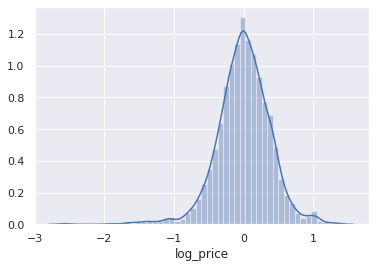

In [43]:
sns.distplot(y_train-y_hat)


In [44]:
reg.score(x_train, y_train)

0.7781436482528401

Finding the weight and bias

In [45]:
reg.intercept_

9.549125860257886

In [46]:
reg.coef_

array([-0.41094084,  0.20745738,  0.02768142,  0.01023398, -0.15423537,
       -0.20660834, -0.07549277, -0.0914711 , -0.12790568, -0.09171446,
       -0.14699288, -0.10769341, -0.16128384, -0.09890293, -0.02971824,
       -0.14300024,  0.30352601])

In [47]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.410941
1,EngineV,0.207457
2,Brand_BMW,0.027681
3,Brand_Mercedes-Benz,0.010234
4,Brand_Mitsubishi,-0.154235
5,Brand_Renault,-0.206608
6,Brand_Toyota,-0.075493
7,Brand_Volkswagen,-0.091471
8,Body_hatch,-0.127906
9,Body_other,-0.091714


Testing

In [48]:
y_hat_test = reg.predict(x_test)

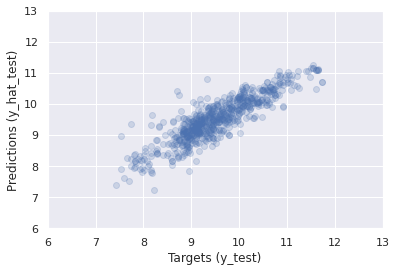

In [49]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [62]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['predictions'])
df_pf.head()

,predictions
0,15846.309072
1,22696.438159
2,12850.899046
3,3520.556716
4,20347.016266


In [63]:
df_pf['Target'] = np.exp(y_test)
df_pf

,predictions,Target
0,15846.309072,21800.0
1,22696.438159,32000.0
2,12850.899046,8499.0
3,3520.556716,5400.0
4,20347.016266,28500.0
...,...,...
687,3963.328108,6650.0
688,23386.351046,33200.0
689,3780.737538,3000.0
690,37630.111129,25500.0


In [64]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.989665
1    10.373491
2     9.047704
3     8.594154
4    10.257659
Name: log_price, dtype: float64

In [65]:
df_pf['Target'] = np.exp(y_test)
df_pf

,predictions,Target
0,15846.309072,21800.0
1,22696.438159,32000.0
2,12850.899046,8499.0
3,3520.556716,5400.0
4,20347.016266,28500.0
...,...,...
687,3963.328108,6650.0
688,23386.351046,33200.0
689,3780.737538,3000.0
690,37630.111129,25500.0


In [70]:
df_pf['Residual'] = df_pf['Target'] - df_pf['predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,predictions,Target,Residual,Difference%
0,15846.309072,21800.0,5953.690928,27.310509
1,22696.438159,32000.0,9303.561841,29.073631
2,12850.899046,8499.0,-4351.899046,51.204836
3,3520.556716,5400.0,1879.443284,34.804505
4,20347.016266,28500.0,8152.983734,28.606960
...,...,...,...,...
687,3963.328108,6650.0,2686.671892,40.401081
688,23386.351046,33200.0,9813.648954,29.559184
689,3780.737538,3000.0,-780.737538,26.024585
690,37630.111129,25500.0,-12130.111129,47.569063


In [71]:
df_pf.describe()

,predictions,Target,Residual,Difference%
count,692.000000,692.000000,692.000000,692.000000
mean,17512.265319,19243.825448,1731.560129,31.774325
std,13126.671431,19390.750145,10074.417582,41.452694
min,1389.031233,1700.000000,-37755.329557,0.175601
25%,8704.058334,8200.000000,-2655.197802,11.739026
50%,13408.321043,12450.000000,55.963934,24.197981
75%,22704.891474,22900.000000,3390.086276,38.242843
max,77009.441048,126000.000000,80800.315250,462.443212


In [74]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,predictions,Target,Residual,Difference%
606,14474.54,14500.00,25.46,0.18
58,11025.22,11000.00,-25.22,0.23
561,7676.55,7650.00,-26.55,0.35
293,13748.39,13700.00,-48.39,0.35
439,15929.80,16000.00,70.20,0.44
356,18888.82,18800.00,-88.82,0.47
125,15081.35,15000.00,-81.35,0.54
248,34298.68,34500.00,201.32,0.58
337,8349.16,8300.00,-49.16,0.59
608,60946.99,61500.00,553.01,0.90
